##데이터설명
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

##**EDA** & **Feature Engineering**


In [18]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/MyDrive/AI_BOOTCAMP/vgames2.csv')
df = df.dropna()
df = df.drop(columns = ['Unnamed: 0'])
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [20]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [21]:
# k 지우고 단위 맞추기
def k_num(i):
  df.loc[df[i].str.contains('K'), i]
  k = df.loc[df[i].str.contains('K'), i]
  k_list = k.str.split('K')
  k[i] = k_list.str.get(0)
  k = pd.to_numeric(k[i])
  k = k / 1000
  k = pd.DataFrame(k)
  return k

In [22]:
# M 지우기
def m_num(i):
  m = df.loc[df[i].str.contains('M'), i]
  m_list = m.str.split('M')
  m[i] = m_list.str.get(0)
  m = pd.to_numeric(m[i])
  m = pd.DataFrame(m)
  return m

In [23]:
k = k_num('NA_Sales')
m = m_num('NA_Sales')
n_k_m = df.loc[~df['NA_Sales'].str.contains('K|M'), 'NA_Sales']
n_k_m = pd.DataFrame(pd.to_numeric(n_k_m))

In [24]:
df2 = k.append(m)
df2 = df2.append(n_k_m)
df2 = df2.sort_index()
df2

,NA_Sales
0,0.04
1,0.17
2,0.00
3,0.04
4,0.12
...,...
16593,0.15
16594,0.01
16595,0.44
16596,0.05


In [25]:
E_k = k_num('EU_Sales')
E_m = m_num('EU_Sales')
E_n_k_m = df.loc[~df['EU_Sales'].str.contains('K|M'), 'EU_Sales']
E_n_k_m = pd.DataFrame(pd.to_numeric(E_n_k_m))
df3 = E_k.append(E_m)
df3 = df3.append(E_n_k_m)
df3 = df3.sort_index()
df3

,EU_Sales
0,0.00
1,0.00
2,0.00
3,0.00
4,0.09
...,...
16593,0.04
16594,0.00
16595,0.19
16596,0.05


In [26]:
J_k = k_num('JP_Sales')
J_m = m_num('JP_Sales')
J_n_k_m = df.loc[~df['JP_Sales'].str.contains('K|M'), 'JP_Sales']
J_n_k_m = pd.DataFrame(pd.to_numeric(J_n_k_m))
df4 = J_k.append(J_m)
df4 = df4.append(J_n_k_m)
df4 = df4.sort_index()
df4

,JP_Sales
0,0.00
1,0.00
2,0.02
3,0.00
4,0.00
...,...
16593,0.00
16594,0.00
16595,0.03
16596,0.25


In [27]:
O_k = k_num('Other_Sales')
O_m = m_num('Other_Sales')
O_n_k_m = df.loc[~df['Other_Sales'].str.contains('K|M'), 'Other_Sales']
O_n_k_m = pd.DataFrame(pd.to_numeric(O_n_k_m))
df5 = O_k.append(O_m)
df5 = df5.append(O_n_k_m)
df5 = df5.sort_index()
df5

,Other_Sales
0,0.00
1,0.01
2,0.00
3,0.00
4,0.04
...,...
16593,0.01
16594,0.00
16595,0.13
16596,0.03


In [28]:
df = df.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df['NA_Sales'] = df2
df['EU_Sales'] = df3
df['JP_Sales'] = df4
df['Other_Sales'] = df5
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [29]:
df['Year'] = pd.to_numeric(df['Year'])

In [30]:
# 한자리, 두자릿수 연도 처리하기

def num(x):
  if x < 50:
    x += 2000
  elif x < 100:
    x += 1900
  return x

In [31]:
df['Year'] = df['Year'].apply(num)

In [32]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 문제1
- 지역에 따라 선호하는 게임 장르가 다를까? 

In [33]:
#각 지역의 장르별 총 판매량 ANOVA Test
# import scipy.stats as stats
# F_statistic, pval = stats.f_oneway(NA_Sales_sum, EU_Sales_sum, JP_Sales_sum, Other_Sales_sum)
# print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pval))
# if pval < 0.05:
#     print('P-value 값이 0.05보다 작으므로 각 지역의 게임 장르 평균값이 통계적으로 유의미하게 차이납니다.')

In [84]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [85]:
import numpy as np
index = np.arange(len(df['Genre'].unique()))
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']

In [86]:
NA_Sales_sum = df.groupby('Genre').NA_Sales.sum()

In [87]:
NA_Sales_sum

Genre
Action          858.75
Adventure       101.79
Fighting        220.35
Misc            394.73
Platform        445.38
Puzzle          121.58
Racing          354.70
Role-Playing    318.76
Shooter         574.48
Simulation      181.43
Sports          667.26
Strategy         67.83
Name: NA_Sales, dtype: float64

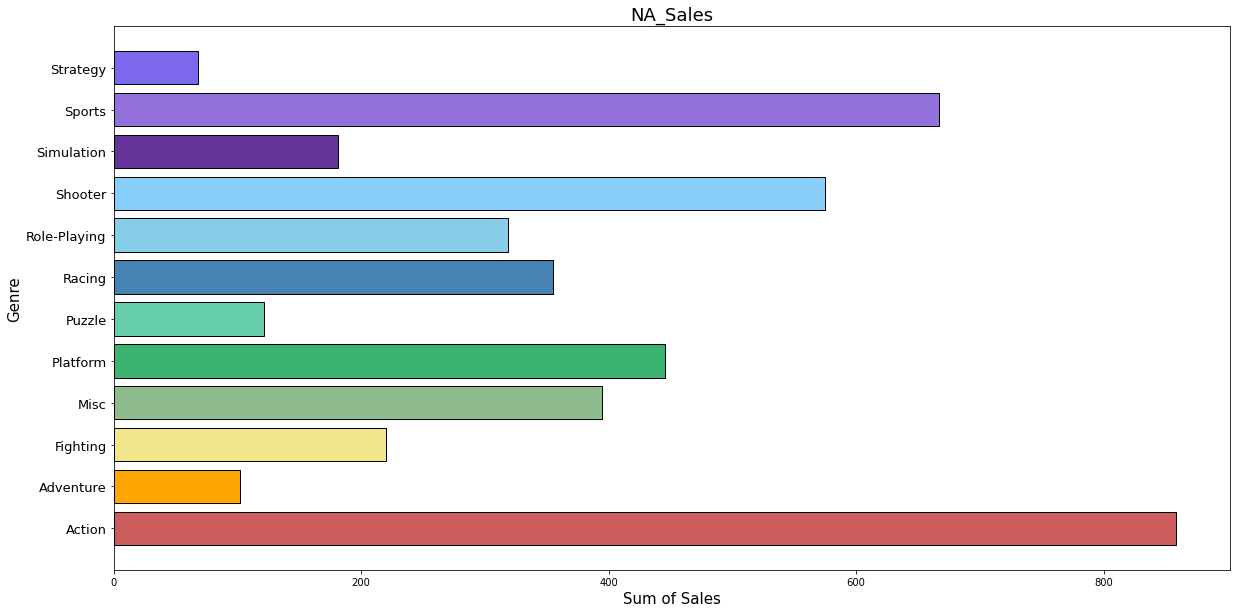

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
plt.barh(index - 0.4, NA_Sales_sum, align = 'edge', edgecolor = 'black',
         color = ['indianred', 'orange', 'khaki', 'darkseagreen', 'mediumseagreen', 'mediumaquamarine',
                  'steelblue','skyblue', 'lightskyblue', 'rebeccapurple', 'mediumpurple', 'mediumslateblue'])
plt.title('NA_Sales', fontsize = 18)
plt.ylabel('Genre', fontsize = 15)
plt.xlabel('Sum of Sales', fontsize = 15)
plt.yticks(index, label, fontsize = 13, rotation=0)
plt.show()

In [89]:
index = np.arange(len(df['Genre'].unique()))
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
EU_Sales_sum = df.groupby('Genre').EU_Sales.sum()

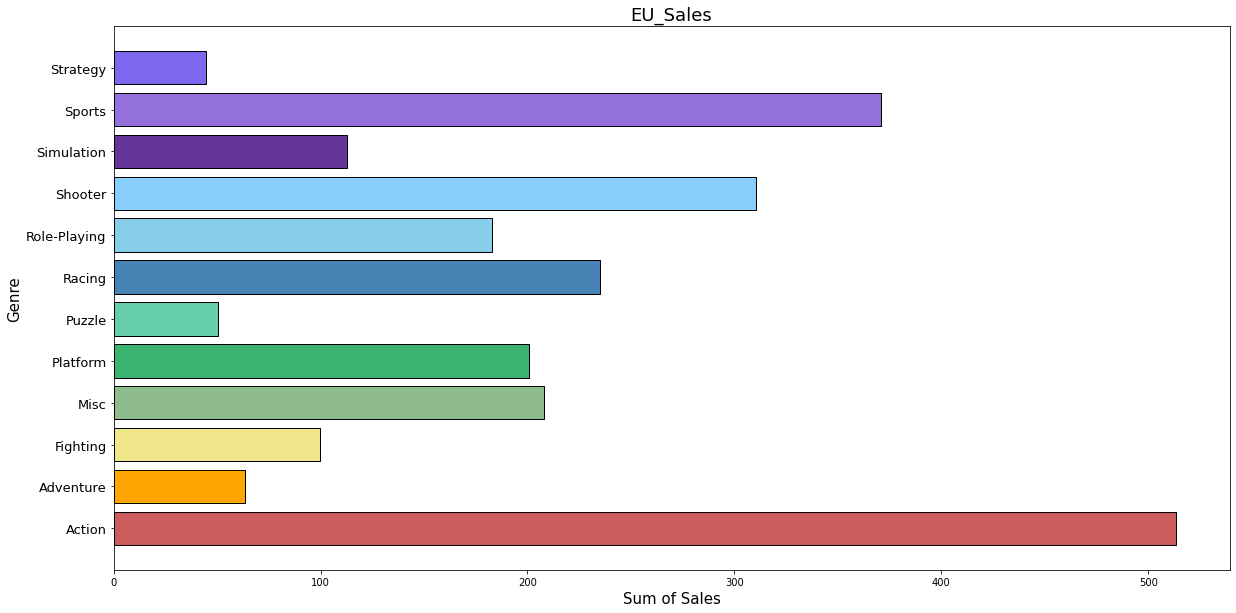

In [91]:
plt.figure(figsize = (20, 10))
plt.barh(index - 0.4, EU_Sales_sum, align = 'edge', edgecolor = 'black',
         color = ['indianred', 'orange', 'khaki', 'darkseagreen', 'mediumseagreen', 'mediumaquamarine',
                  'steelblue','skyblue', 'lightskyblue', 'rebeccapurple', 'mediumpurple', 'mediumslateblue'])
plt.title('EU_Sales', fontsize = 18)
plt.ylabel('Genre', fontsize = 15)
plt.xlabel('Sum of Sales', fontsize = 15)
plt.yticks(index, label, fontsize = 13, rotation = 0)
plt.show()

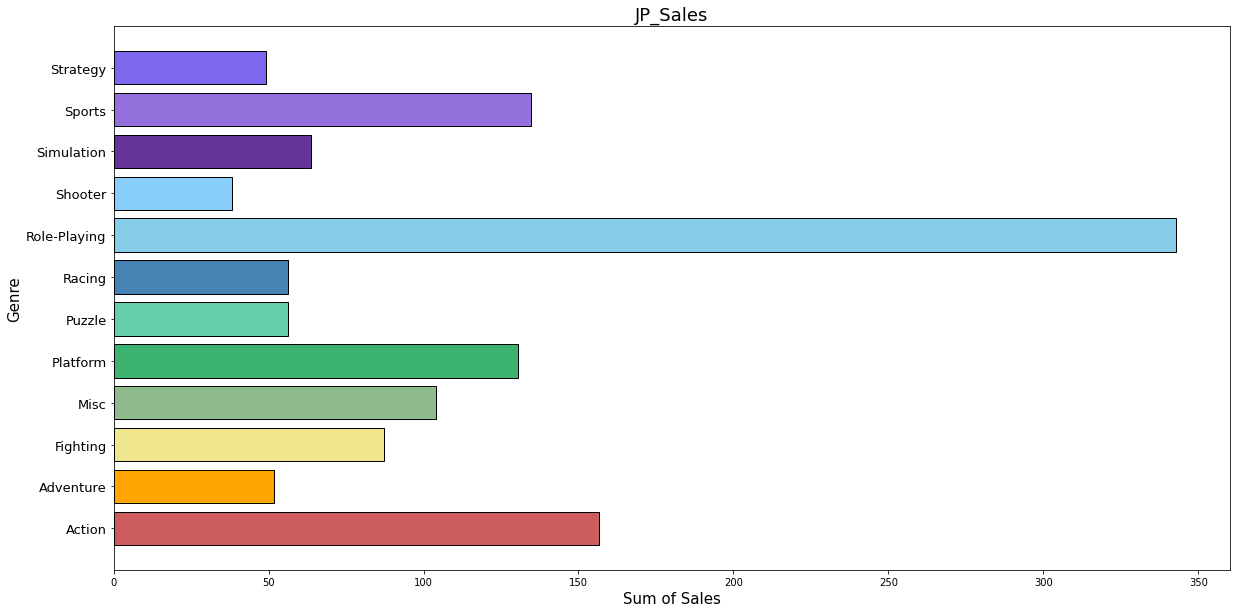

In [92]:
index = np.arange(len(df['Genre'].unique()))
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
JP_Sales_sum = df.groupby('Genre').JP_Sales.sum()

plt.figure(figsize = (20,10))
plt.barh(index - 0.4, JP_Sales_sum, align = 'edge', edgecolor = 'black',
         color = ['indianred', 'orange', 'khaki', 'darkseagreen', 'mediumseagreen', 'mediumaquamarine',
                  'steelblue','skyblue', 'lightskyblue', 'rebeccapurple', 'mediumpurple', 'mediumslateblue'])
plt.title('JP_Sales', fontsize = 18)
plt.ylabel('Genre', fontsize = 15)
plt.xlabel('Sum of Sales', fontsize = 15)
plt.yticks(index, label, fontsize = 13, rotation=0)
plt.show()

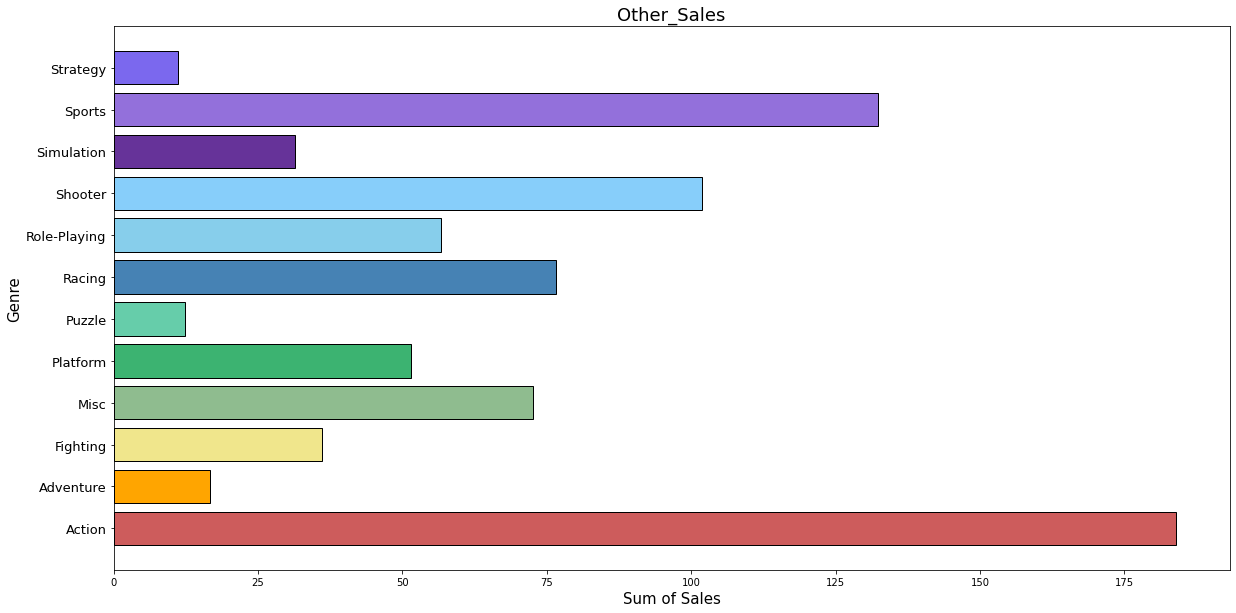

In [93]:
index = np.arange(len(df['Genre'].unique()))
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
Other_Sales_sum = df.groupby('Genre').Other_Sales.sum()

plt.figure(figsize = (20,10))
plt.barh(index - 0.4, Other_Sales_sum, align = 'edge', edgecolor = 'black',
         color = ['indianred', 'orange', 'khaki', 'darkseagreen', 'mediumseagreen', 'mediumaquamarine',
                  'steelblue','skyblue', 'lightskyblue', 'rebeccapurple', 'mediumpurple', 'mediumslateblue'])
plt.title('Other_Sales', fontsize = 18)
plt.ylabel('Genre', fontsize = 15)
plt.xlabel('Sum of Sales', fontsize = 15)
plt.yticks(index, label, fontsize = 13, rotation=0)
plt.show()

##문제2
- 연도별 게임의 트렌드가 있을까?

In [42]:
#Year컬럼 int형 변환
df['Year'] = df['Year'].astype(int)

In [43]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [44]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [45]:
len(df['Year'].unique())

39

In [46]:
Genre_group = df.groupby(['Year','Genre'])
Genre_group = Genre_group.sum()
Genre_group = pd.DataFrame(Genre_group)
Genre_group['sum_sales'] = (Genre_group['NA_Sales'] + Genre_group['JP_Sales'] + Genre_group['Other_Sales'] + Genre_group['EU_Sales'])
Genre_group = Genre_group.drop(columns = ['NA_Sales', 'JP_Sales', 'Other_Sales', 'EU_Sales'])
Genre_group

sum_sales
Year Genre                  
1980 Action             0.34
     Fighting           0.77
     Misc               2.70
     Shooter            7.07
1981 Action            14.79
...                      ...
2016 Sports            14.63
     Strategy           0.52
2017 Action             0.01
     Role-Playing       0.04
2020 Simulation         0.29

[388 rows x 1 columns]

In [47]:
Genre_group = Genre_group.reset_index()
Genre_group

,Year,Genre,sum_sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.63
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [48]:
Group = Genre_group.groupby(by=['Year'])['sum_sales'].transform(max) == Genre_group['sum_sales']
Group_max = Genre_group[Group].reset_index(drop=True)
Group_max

,Year,Genre,sum_sales
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


In [49]:
Group_max['Genre'].unique()

array(['Shooter', 'Action', 'Puzzle', 'Platform', 'Fighting',
       'Role-Playing', 'Racing', 'Sports', 'Simulation'], dtype=object)

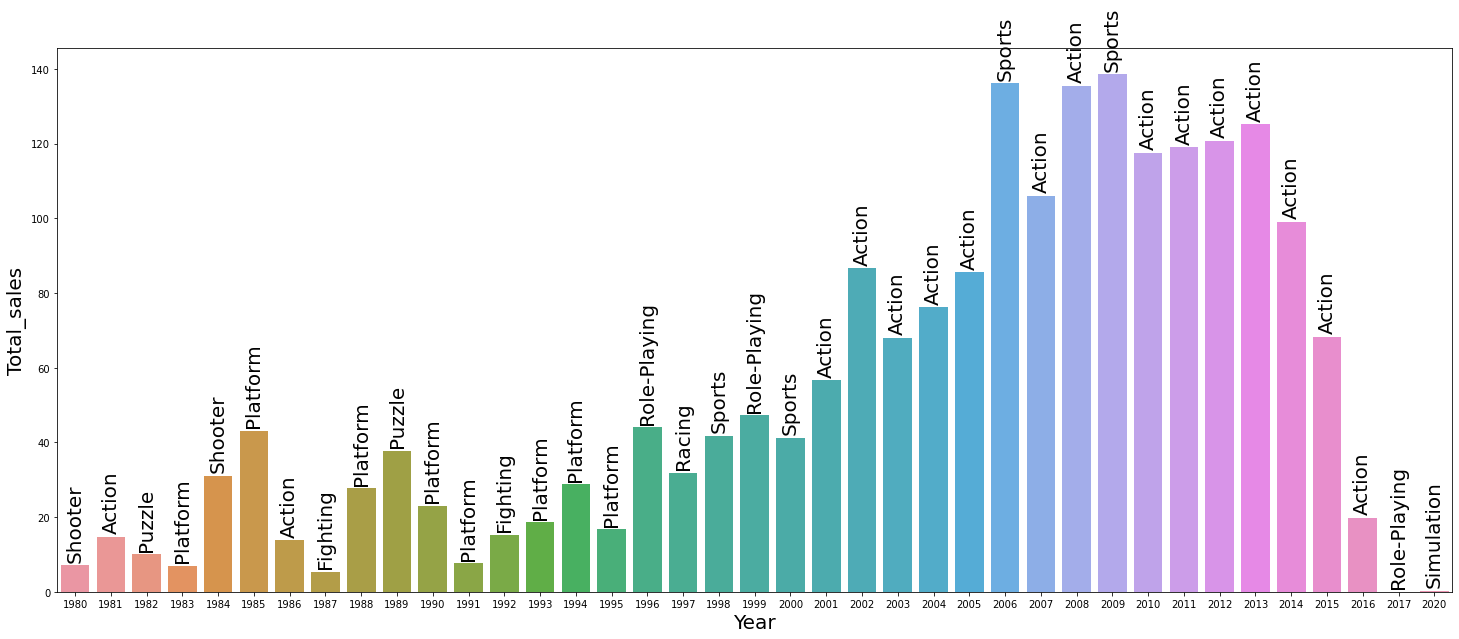

In [94]:
#연도별 게임의 트랜드
plt.figure(figsize = (25,10))
sns.barplot(x = 'Year', y = 'sum_sales', data = Group_max);
index = 0
genre = Group_max['Genre']

for i in Group_max['sum_sales']:
    plt.text(index, i + 2, genre[index], color='#000', size=20, rotation= 90, ha="center") #(index, i+2) 위치에 genre[index] 써라.
    index += 1
plt.ylabel('Total_sales', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

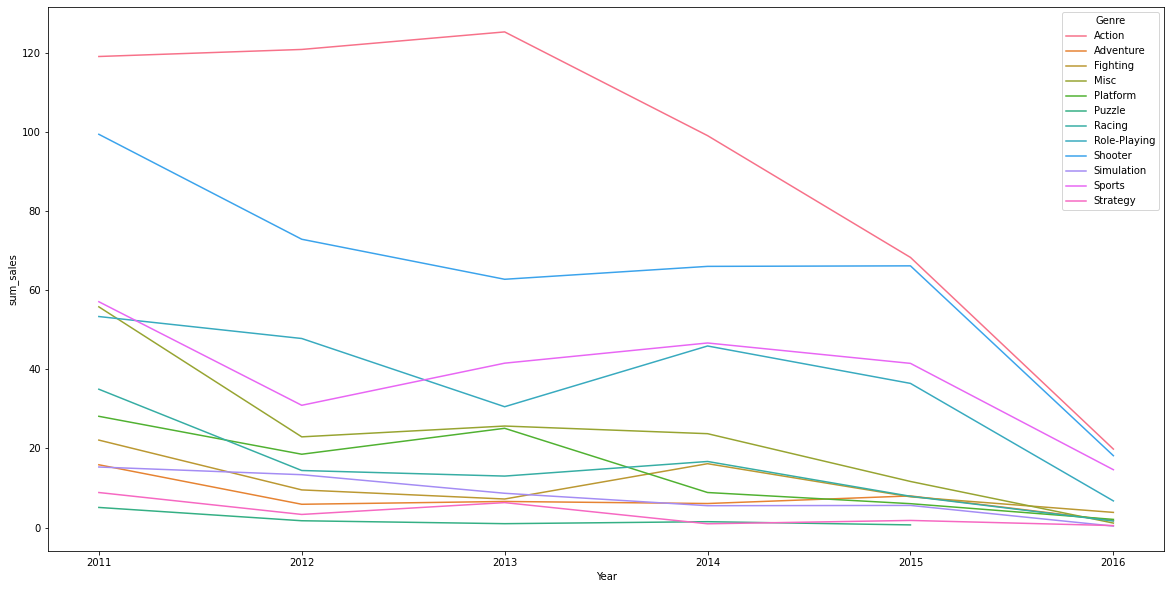

In [99]:
#a = Genre_group.loc[:66, :]
#b = Genre_group.loc[67:181 , :]
#c = Genre_group.loc[182:313, :]

# 최근 5년간 장르별 판매량 
d = Genre_group.loc[314:384, :]
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Year', y = 'sum_sales', hue = 'Genre' , data = d);

##문제3
- 출고량이 높은 게임에 대한 분석 및 시각화

In [52]:
df['Total_sales'] = df['NA_Sales'] + df['JP_Sales'] + df['Other_Sales'] + df['EU_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [53]:
df['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [54]:
#판매량 높은 게임 top20
best_game = df.sort_values(by=['Total_sales'], ascending=False)
top_game = best_game.head(20)
top_game = top_game.reset_index(drop = True)
top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [55]:
top_game['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
       'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
       'Duck Hunt', 'Nintendogs', 'Mario Kart DS',
       'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Wii Fit Plus',
       'Kinect Adventures!', 'Grand Theft Auto V',
       'Grand Theft Auto: San Andreas', 'Super Mario World',
       'Brain Age: Train Your Brain in Minutes a Day'], dtype=object)

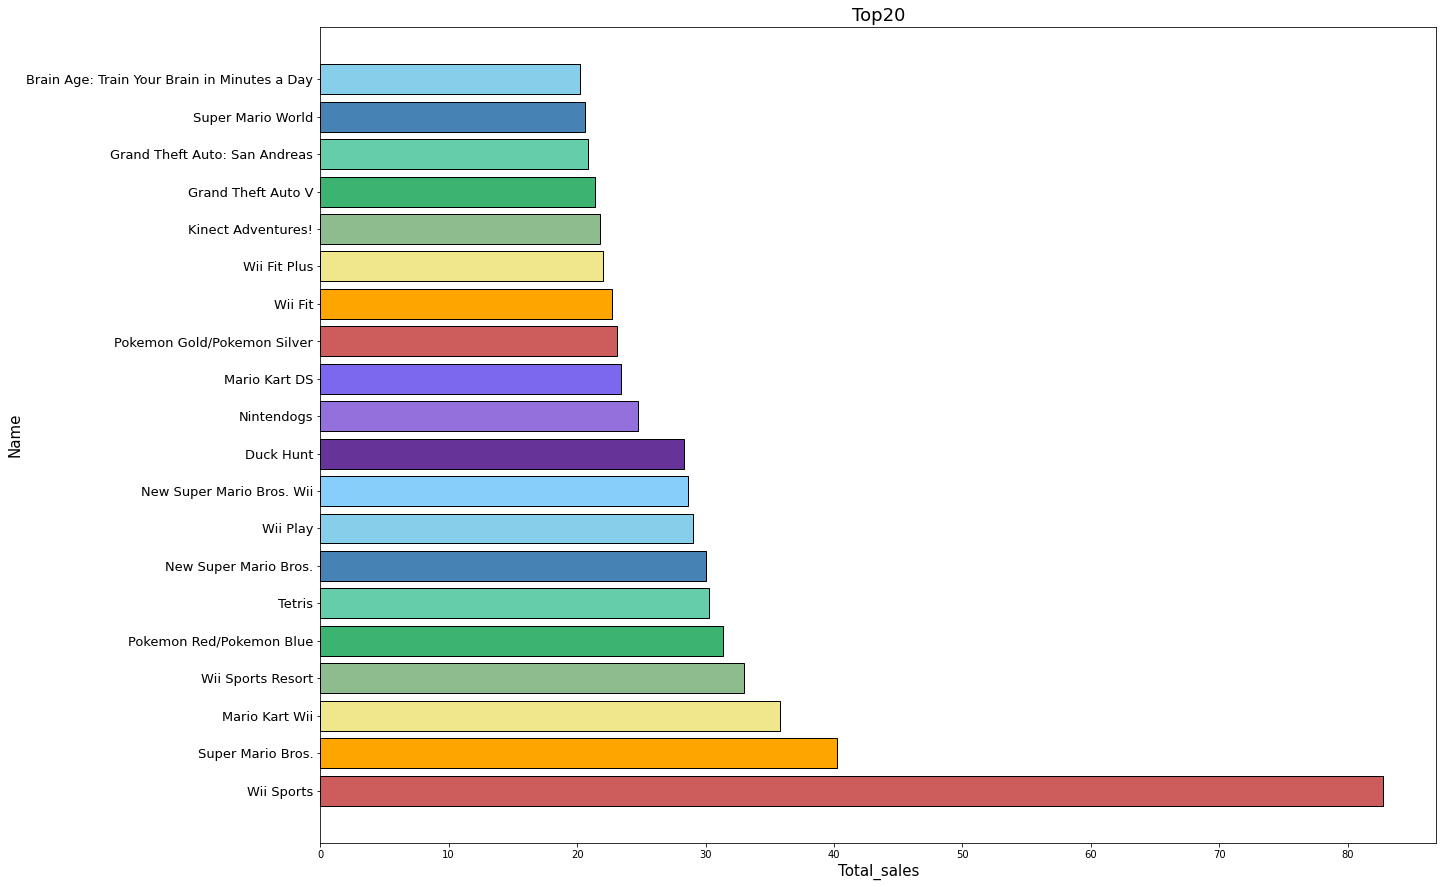

In [103]:
index = np.arange(len(top_game['Name'].unique()))
label = ['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
       'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
       'Duck Hunt', 'Nintendogs', 'Mario Kart DS',
       'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Wii Fit Plus',
       'Kinect Adventures!', 'Grand Theft Auto V',
       'Grand Theft Auto: San Andreas', 'Super Mario World',
       'Brain Age: Train Your Brain in Minutes a Day']
sales_sum = top_game['Total_sales']

plt.figure(figsize = (20, 15))
plt.barh(index, sales_sum, align = 'edge', edgecolor = 'black',
         color = ['indianred', 'orange', 'khaki', 'darkseagreen', 'mediumseagreen', 'mediumaquamarine',
                  'steelblue','skyblue', 'lightskyblue', 'rebeccapurple', 'mediumpurple', 'mediumslateblue'])
plt.title('Top20', fontsize = 18)
plt.ylabel('Name', fontsize = 15)
plt.xlabel('Total_sales', fontsize = 15)
plt.yticks(index + 0.4 , label, fontsize = 13, rotation=0)
plt.show()

In [57]:
# 판매량 상위 20개 게임의 플랫폼별 판매량 
top_game_group = top_game.groupby('Platform')['Total_sales']
top_game_group = top_game_group.sum()
top_game_group = pd.DataFrame(top_game_group)
top_game_group = top_game_group.sort_values(by=['Total_sales'], ascending=False)
top_game_group

,Total_sales
Platform,
Wii,253.91
DS,98.41
GB,84.73
NES,68.55
X360,21.82
PS3,21.39
PS2,20.81
SNES,20.62


In [58]:
#판매량 상위20개 게임의 장르별 판매량
top_game_Genre = top_game.groupby('Genre')['Total_sales']
top_game_Genre = top_game_Genre.sum()
top_game_Genre = pd.DataFrame(top_game_Genre)
top_game_Genre = top_game_Genre.sort_values(by=['Total_sales'], ascending=False)
top_game_Genre

,Total_sales
Genre,
Sports,160.46
Platform,119.48
Misc,71.05
Racing,59.26
Role-Playing,54.47
Action,42.20
Puzzle,30.26
Shooter,28.31
Simulation,24.75


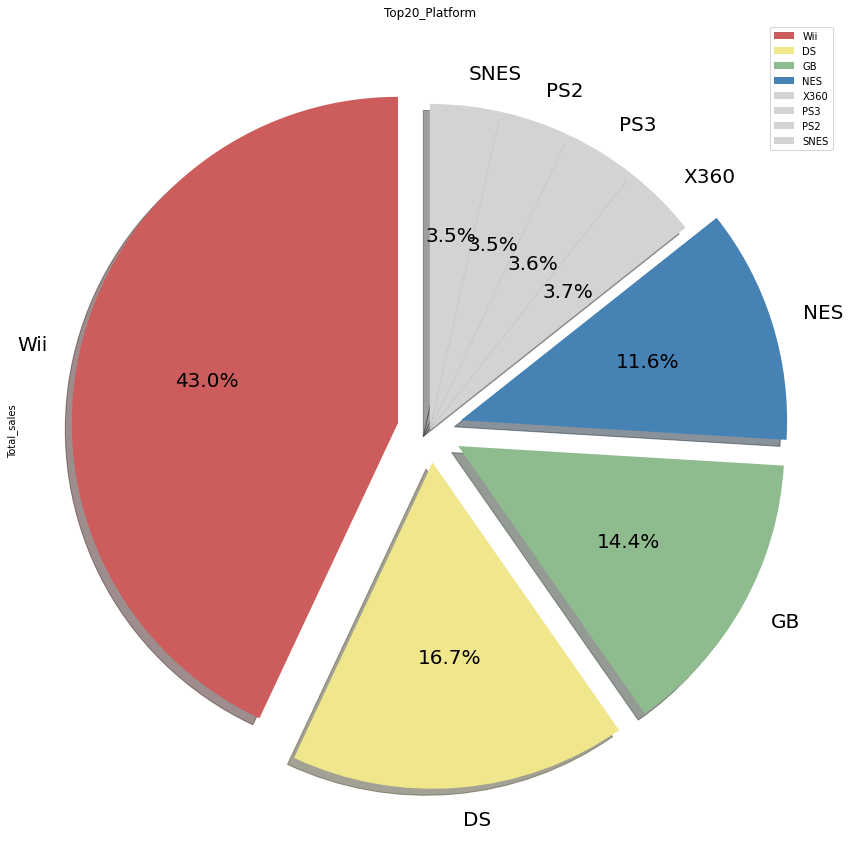

In [100]:
# 판매량 상위 20개 게임의 플랫폼 비율
top_game_group['Total_sales'].plot(kind = 'pie', figsize = (15,15), autopct = '%1.1f%%', explode = (0.1,0.1,0.1,0.1,0,0,0,0),
                                   colors = ['indianred', 'khaki', 'darkseagreen', 'steelblue','lightgray', 'lightgray', 'lightgray', 'lightgray'],
                                   startangle = 90, title = 'Top20_Platform', fontsize = 20, shadow = True, legend = True);

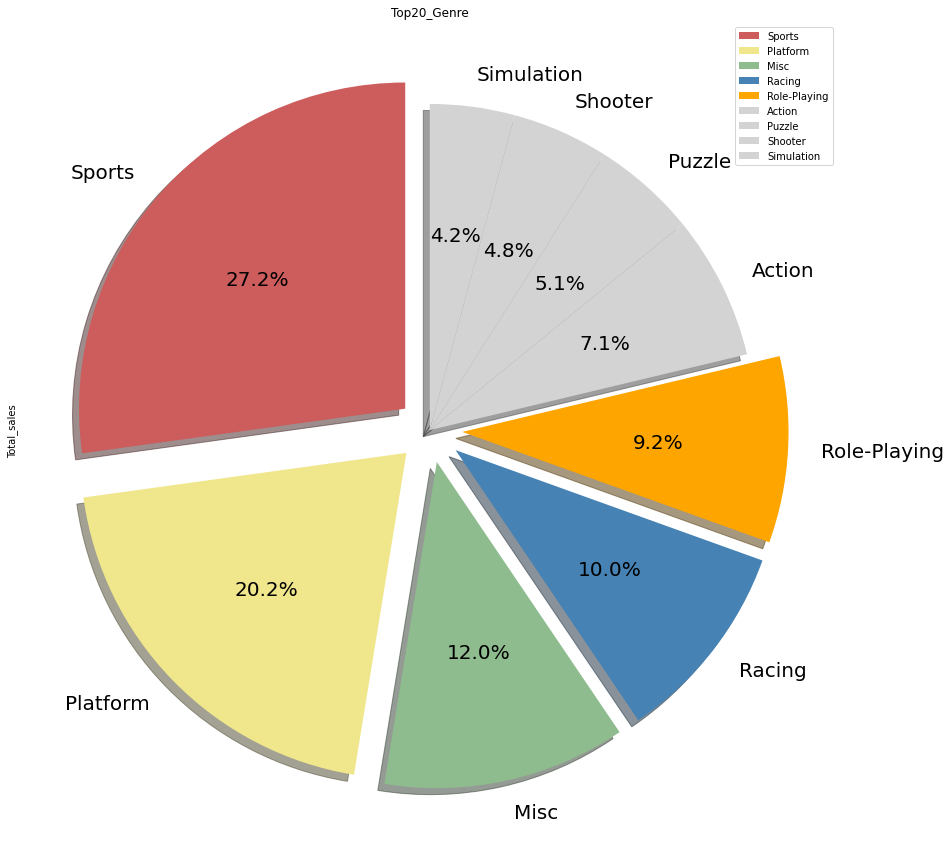

In [101]:
#판매량 상위20개 게임의 장르비율
top_game_Genre['Total_sales'].plot(kind = 'pie', figsize = (15, 15), autopct = '%1.1f%%', explode = (0.1,0.1,0.1,0.1,0.1,0,0,0,0),
                                   colors = ['indianred', 'khaki', 'darkseagreen', 'steelblue','orange', 'lightgray', 'lightgray', 'lightgray', 'lightgray'],
                                   startangle = 90, title = 'Top20_Genre', fontsize = 20, shadow = True, legend = True);

In [61]:
'''
전체적인 판매량, 최근 5년간 출시된 게임을 봤을때 Action 장르 게임의 판매량이 압도적으로 높았으나,
판매량 top20 에서는 Sports 장르가 많음.

연도별 트렌드를 봤을때 2000년대 이후에 Action 장르의 판매량이 급증했으나
2006, 2009년도에는 Sports 장르의 판매량이 더 높았는데, 이것의 영향일 것이라고 생각됨.
'''
top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [62]:
top_game['Year'].value_counts() #실제로 top20개의 게임중에서도 2006, 2009, 2005 년도가 가장 많음.

2006    3
2009    3
2005    3
1985    1
2008    1
1996    1
1989    1
1984    1
1999    1
2007    1
2010    1
2013    1
2004    1
1990    1
Name: Year, dtype: int64

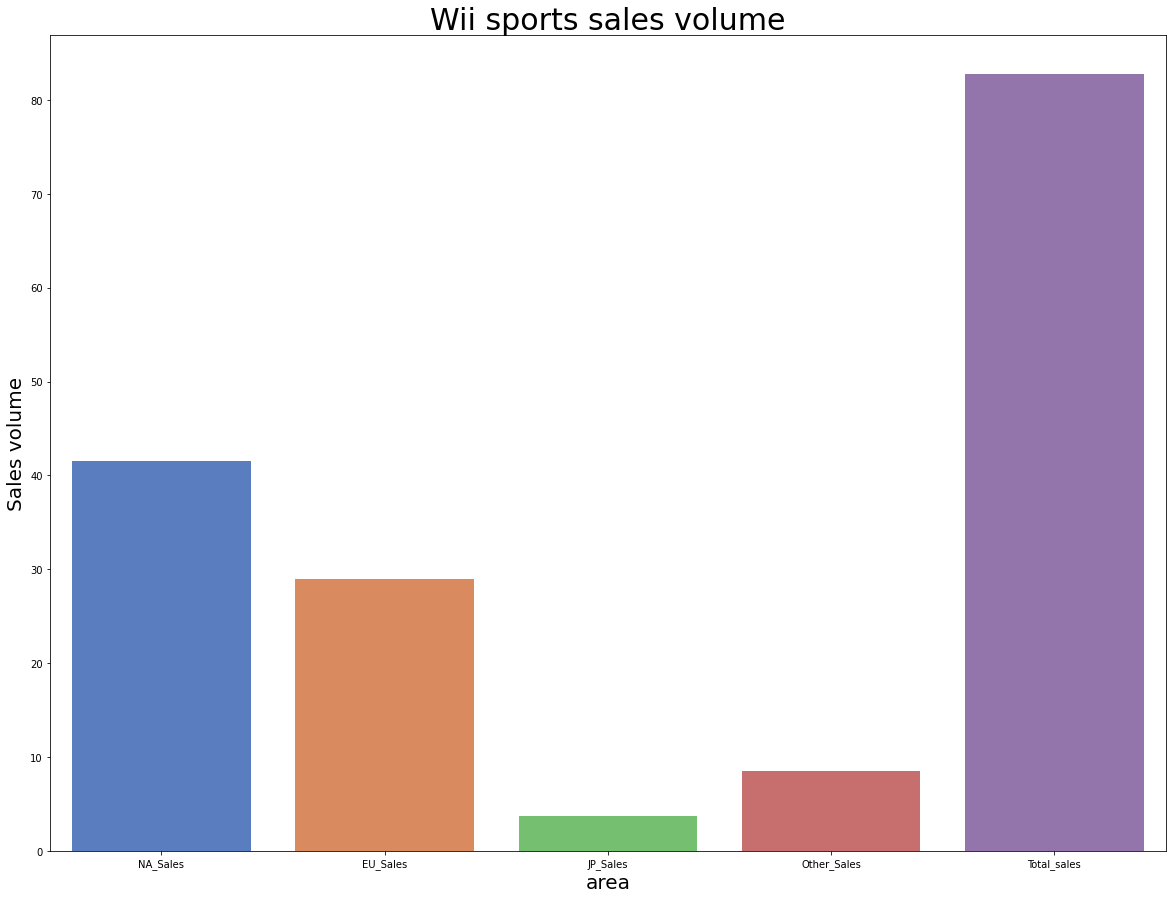

In [102]:
# 출고량이 가장 높은 'Wii Sports'의 지역별 판매량
df_Wii = df[df['Name'] == 'Wii Sports']
df_Wii = df_Wii.drop(columns = ['Year'])

plt.figure(figsize=(20, 15))
#sns.set_style('whitegrid')
sns.set_palette("muted")
plt.title("Wii sports sales volume", fontsize=30)
plt.xlabel("area", fontsize=20)
plt.ylabel("Sales volume", fontsize=20)

sns.barplot(data = df_Wii);

In [109]:
#지역별 상위 5개 게임의 플랫폼
df_NA_Sales = df.sort_values(by=['NA_Sales'], ascending=False)
df_NA_Sales = df_NA_Sales.drop(columns = ['EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_sales'])
df_NA_Sales = df_NA_Sales.head(10)
df_NA_Sales

,Name,Platform,Year,Genre,Publisher,NA_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03
13111,Super Mario World,SNES,1990,Platform,Nintendo,12.78


In [110]:
NA_Sales_group = df_NA_Sales.groupby('Platform')['NA_Sales'].sum()
NA_Sales_group = NA_Sales_group.sort_values(ascending=False)
NA_Sales_group

Platform
Wii     101.71
NES      56.01
GB       23.20
X360     14.97
SNES     12.78
Name: NA_Sales, dtype: float64

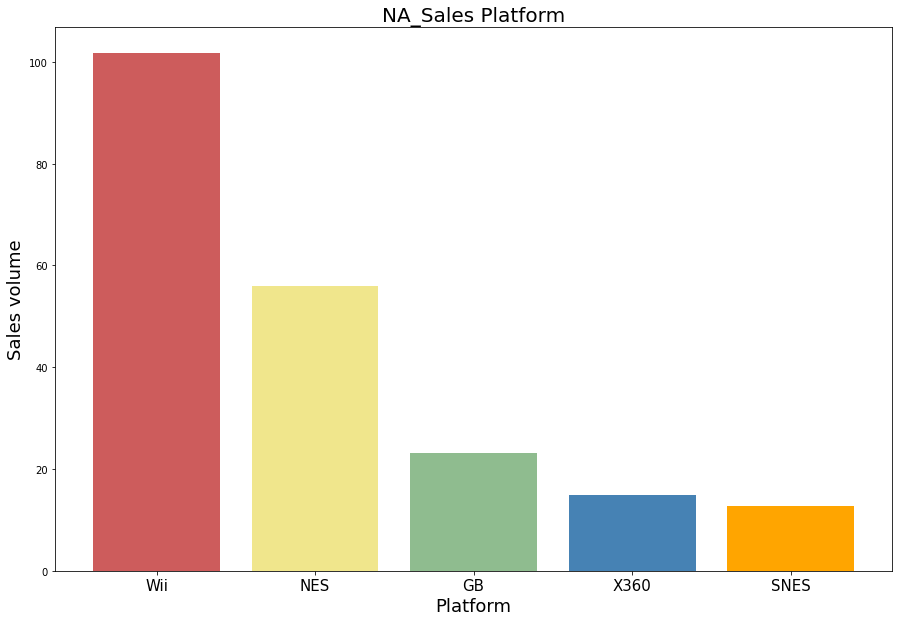

In [131]:
label = ['Wii', 'NES', 'GB', 'X360', 'SNES']
index = np.arange(5)
plt.figure(figsize=(15, 10))

plt.bar(index, NA_Sales_group, color = ['indianred', 'khaki', 'darkseagreen', 'steelblue', 'orange'])
plt.title('NA_Sales Platform', fontsize=20)
plt.xlabel('Platform', fontsize=18)
plt.ylabel('Sales volume', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

In [119]:
df_EU_Sales = df.sort_values(by=['EU_Sales'], ascending=False)
df_EU_Sales = df_EU_Sales.drop(columns = ['NA_Sales', 'JP_Sales', 'Other_Sales', 'Total_sales'])
df_EU_Sales= df_EU_Sales.head(10)
df_EU_Sales

,Name,Platform,Year,Genre,Publisher,EU_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,29.02
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,12.88
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,11.01
11137,Nintendogs,DS,2005,Simulation,Nintendo,11.00
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,9.27
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,9.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,9.23
3014,Wii Play,Wii,2006,Misc,Nintendo,9.20
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,8.89
10899,Wii Fit Plus,Wii,2009,Sports,Nintendo,8.59


In [120]:
EU_Sales_group = df_EU_Sales.groupby('Platform')['EU_Sales'].sum()
EU_Sales_group = EU_Sales_group.sort_values(ascending=False)
EU_Sales_group

Platform
Wii    70.70
DS     29.49
PS3     9.27
GB      8.89
Name: EU_Sales, dtype: float64

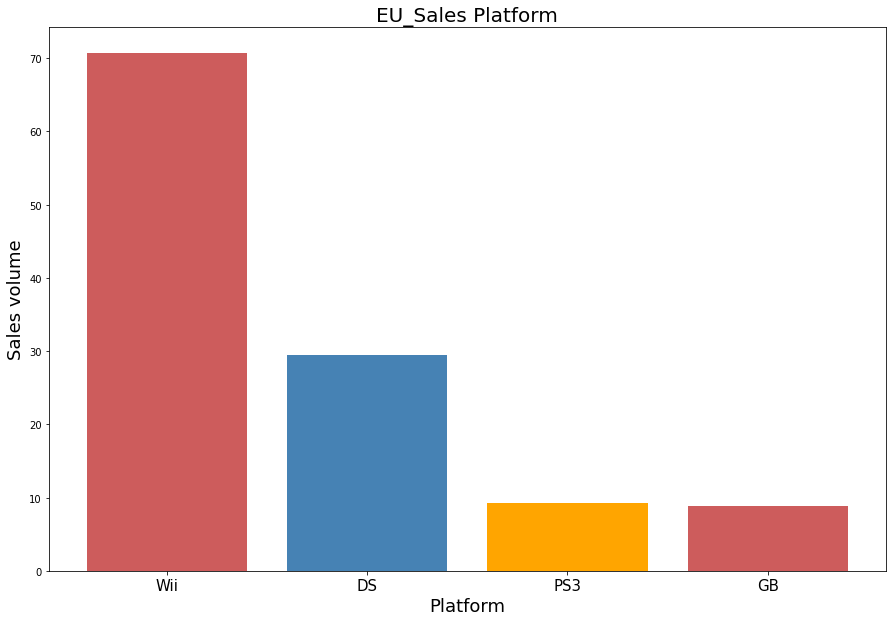

In [132]:
label = ['Wii', 'DS', 'PS3','GB']
index = np.arange(4)
plt.figure(figsize=(15, 10))

plt.bar(index, EU_Sales_group, color = ['indianred', 'steelblue', 'orange'])
plt.title('EU_Sales Platform', fontsize=20)
plt.xlabel('Platform', fontsize=18)
plt.ylabel('Sales volume', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

In [122]:
df_JP_Sales = df.sort_values(by=['JP_Sales'], ascending=False)
df_JP_Sales = df_JP_Sales.drop(columns = ['NA_Sales', 'EU_Sales', 'Other_Sales', 'Total_sales'])
df_JP_Sales= df_JP_Sales.head(10)
df_JP_Sales

,Name,Platform,Year,Genre,Publisher,JP_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,10.22
9416,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,7.20
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,6.81
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
10555,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.04
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.65
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,5.38
3273,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,5.33
511,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,5.32
1847,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,4.87


In [123]:
JP_Sales_group = df_JP_Sales.groupby('Platform')['JP_Sales'].sum()
JP_Sales_group = JP_Sales_group.sort_values(ascending=False)
JP_Sales_group

Platform
DS     28.84
GB     17.42
NES     6.81
GBA     5.38
PSP     4.87
Name: JP_Sales, dtype: float64

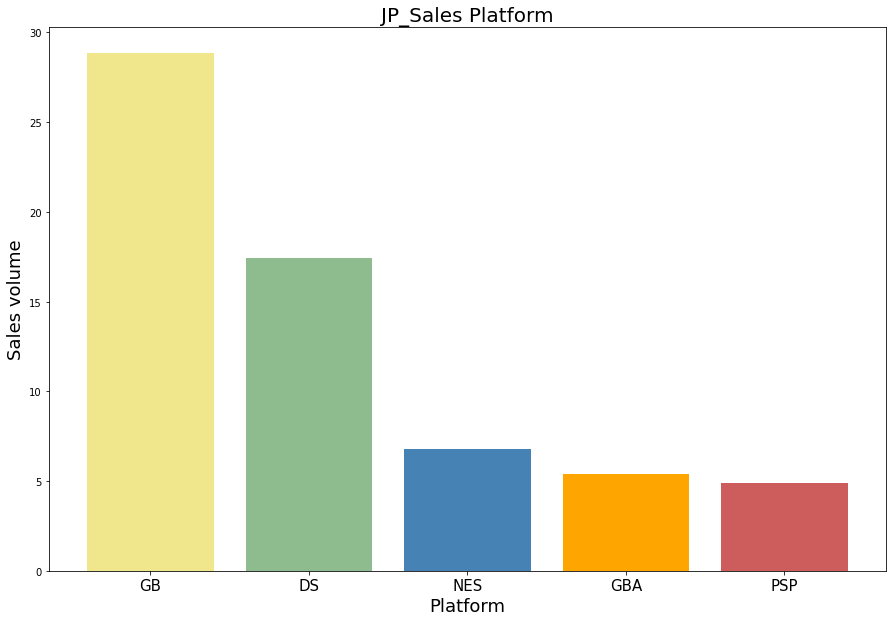

In [133]:
label = ['GB', 'DS', 'NES', 'GBA','PSP']
index = np.arange(5)
plt.figure(figsize=(15, 10))

plt.bar(index, JP_Sales_group, color = ['khaki', 'darkseagreen', 'steelblue', 'orange', 'indianred'])
plt.title('JP_Sales Platform', fontsize=20)
plt.xlabel('Platform', fontsize=18)
plt.ylabel('Sales volume', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

In [127]:
df_Other_Sales = df.sort_values(by=['Other_Sales'], ascending=False)
df_Other_Sales = df_Other_Sales.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Total_sales'])
df_Other_Sales= df_Other_Sales.head(10)
df_Other_Sales

,Name,Platform,Year,Genre,Publisher,Other_Sales
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,10.57
2908,Wii Sports,Wii,2006,Sports,Nintendo,8.46
14665,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,7.53
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,4.14
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.31
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.96
8213,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,2.93
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,2.90
3014,Wii Play,Wii,2006,Misc,Nintendo,2.85
11137,Nintendogs,DS,2005,Simulation,Nintendo,2.75


In [128]:
Other_Sales_group = df_Other_Sales.groupby('Platform')['Other_Sales'].sum()
Other_Sales_group = Other_Sales_group.sort_values(ascending=False)
Other_Sales_group

Platform
PS2    21.03
Wii    17.58
DS      5.65
PS3     4.14
Name: Other_Sales, dtype: float64

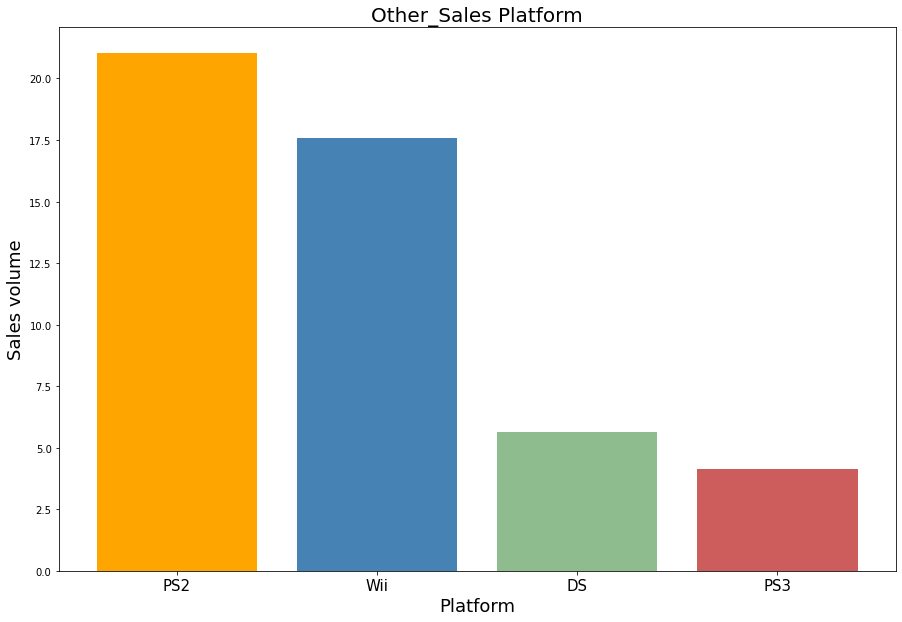

In [134]:
label = ['PS2', 'Wii','DS', 'PS3']
index = np.arange(4)
plt.figure(figsize=(15, 10))

plt.bar(index, Other_Sales_group, color = ['orange', 'steelblue', 'darkseagreen', 'indianred'])
plt.title('Other_Sales Platform', fontsize=20)
plt.xlabel('Platform', fontsize=18)
plt.ylabel('Sales volume', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()

In [114]:
df_Total_sales = df.sort_values(by=['Total_sales'], ascending=False)
df_Total_sales = df_Total_sales.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df_Total_sales= df_Total_sales.head(10)

Total_sales_group = df_Total_sales.groupby('Platform')['Total_sales'].sum()
Total_sales_group = Total_sales_group.sort_values(ascending=False)
Total_sales_group

Platform
Wii    209.19
NES     68.55
GB      61.64
DS      30.01
Name: Total_sales, dtype: float64

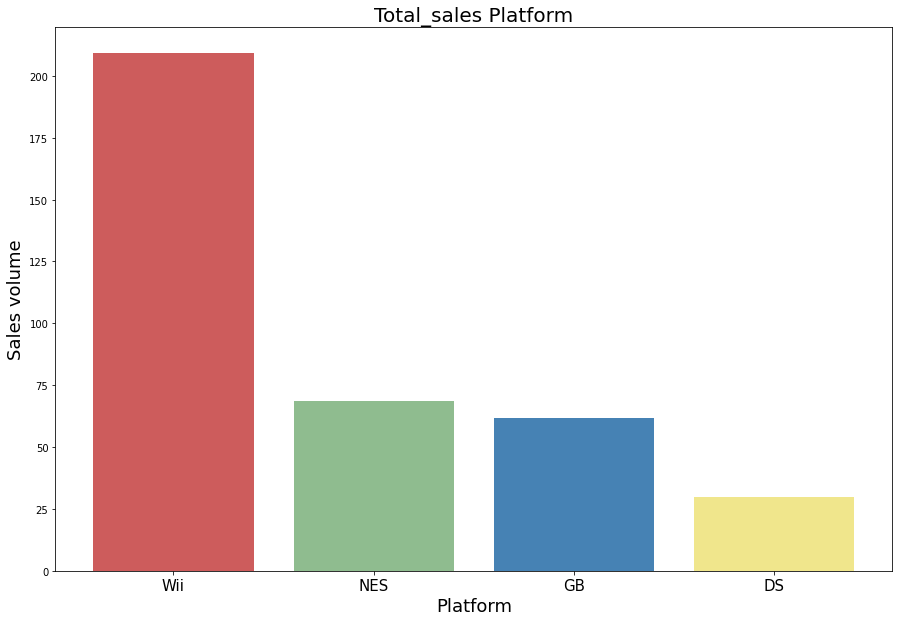

In [135]:
label = ['Wii', 'NES', 'GB','DS']
index = np.arange(4)
plt.figure(figsize=(15, 10))

plt.bar(index, Total_sales_group, color = ['indianred', 'darkseagreen', 'steelblue', 'khaki'])
plt.title('Total_sales Platform', fontsize=20)
plt.xlabel('Platform', fontsize=18)
plt.ylabel('Sales volume', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()